In [175]:
import pandas as pd
from wordcloud import WordCloud 
import pickle
import matplotlib.pyplot as plt

In [188]:
def get_sentiments(x,sent_dict):
    '''
    x:         List
               Input data: Row of a DataFrame
    sent_dict: Dictionary
               Input: Dictionary of Words: Sentiments
    sentiment: String
               Output: Sentiment of the whole sentence
    
    Function: Getting sentiments of the entire sentence by averaging out the sentiments of individual words
    '''
    count = {0:0, 1:0, 2:0, 3:0}
    test = x['no_stop']
    for t in test:
        if t in sent_dict:
            count[sent_dict[t]] += 1
    count[0] /= 0.188
    count[1] /= 0.201
    count[2] /= 0.461
    count[3] /= 0.149

    max_val = max(count, key=count.get)
    return max_val

In [189]:
# 0 is nfts, 1 analysis and negative, 2 positive, 3 is about laws and world stuff

with open('model.pkl', 'rb') as f:
    words_dict = pickle.load(f)
df = pd.read_pickle('test.pickle')
df["sentiment"] = df.apply(get_sentiments, args=(words_dict,), axis=1)

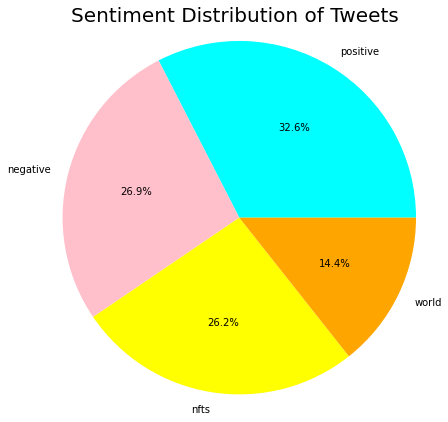

,index,sentiments_val
0,positive,651
1,negative,539
2,nfts,523
3,world,287


In [190]:
# Plotting pie chart of Sentiment Distribution of tweets
emotion = {0: "nfts",
           1: "negative",
           2: "positive",
           3: "world"}

df["sentiments_val"] = df["sentiment"].map(emotion)
df_pie = df["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["cyan","pink","yellow", "orange"]
plt.pie(df_pie["sentiments_val"],labels=df_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets ", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
df_pie

In [185]:
def create_wordcloud(text):
    words=' '.join([words for words in text])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

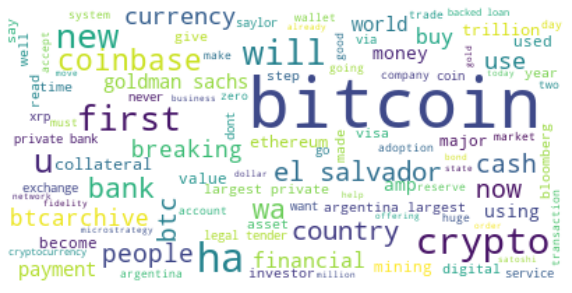

In [194]:
create_wordcloud(df[df["sentiment"]==3]["prepped"].values)